In [1]:
# Import necessary libraries
import os
import glob
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adam
import matplotlib.pyplot as plt

C:\Users\soumi\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
# Define function to extract MFCC features from audio files
def extract_features(file_name):
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        mfccs_scaled = np.mean(mfccs.T, axis=0)
    except Exception as e:
        print("Error encountered while parsing file: ", file_name)
        return None
    return mfccs_scaled

In [4]:
# Define function to load data from RAVDESS dataset
def load_data():
    x, y = [], []
    actors = ['01', '02', '03', '04', '05', '06', '07', '08','09','10','11','12','13','14','15','16','17','18','19','20','21','23','24']
    for actor in actors:
        for file in glob.glob(f"F:/Docs/Data Science/Projects/ravdess-emotional-speech-audio/Actor_*/*{actor}.wav"):
            feature = extract_features(file)
            if feature is not None:
                x.append(feature)
                y.append(actor)
        print(f"Number of samples for {actor}: {len(x)}")
    return x, y

# Load data
x, y = load_data()

# Check if data is loaded correctly
print(f"Number of samples: {len(x)}, Number of labels: {len(y)}")

Number of samples for 01: 60
Number of samples for 02: 120
Number of samples for 03: 180
Number of samples for 04: 240
Number of samples for 05: 300
Number of samples for 06: 360
Number of samples for 07: 420
Number of samples for 08: 480
Number of samples for 09: 540
Number of samples for 10: 600
Number of samples for 11: 660
Number of samples for 12: 720
Number of samples for 13: 780
Number of samples for 14: 840
Number of samples for 15: 900
Number of samples for 16: 960
Number of samples for 17: 1020
Number of samples for 18: 1080
Number of samples for 19: 1140
Number of samples for 20: 1200
Number of samples for 21: 1260
Number of samples for 23: 1320
Number of samples for 24: 1380
Number of samples: 1380, Number of labels: 1380


In [18]:
# Encode labels
le = LabelEncoder()
yy = np_utils.to_categorical(le.fit_transform(y))

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(np.array(x), yy, test_size=0.2, random_state=42)

In [19]:
# Define model
model = Sequential()
model.add(Dense(256, input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(23))
model.add(Activation('softmax'))

# Compile model
opt = Adam(lr=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [20]:
# Train model
history = model.fit(x_train, y_train, batch_size=32, epochs=500, validation_data=(x_test, y_test))

# Evaluate model
loss, acc = model.evaluate(x_test, y_test, batch_size=32)
print(f"Loss: {loss}")
print(f"Accuracy: {acc}")

Epoch 1/500
35/35 [==============================] - 1s 7ms/step - loss: 137.1799 - accuracy: 0.0471 - val_loss: 95.7065 - val_accuracy: 0.0471
Epoch 2/500
35/35 [==============================] - 0s 3ms/step - loss: 117.5305 - accuracy: 0.0480 - val_loss: 63.8053 - val_accuracy: 0.0471
Epoch 3/500
35/35 [==============================] - 0s 3ms/step - loss: 107.2180 - accuracy: 0.0534 - val_loss: 44.1508 - val_accuracy: 0.0471
Epoch 4/500
35/35 [==============================] - 0s 3ms/step - loss: 96.5926 - accuracy: 0.0389 - val_loss: 30.7123 - val_accuracy: 0.0507
Epoch 5/500
35/35 [==============================] - 0s 3ms/step - loss: 91.4078 - accuracy: 0.0435 - val_loss: 22.8447 - val_accuracy: 0.0507
Epoch 6/500
35/35 [==============================] - 0s 3ms/step - loss: 84.9547 - accuracy: 0.0616 - val_loss: 17.0114 - val_accuracy: 0.0435
Epoch 7/500
35/35 [==============================] - 0s 3ms/step - loss: 80.4203 - accuracy: 0.0399 - val_loss: 13.3187 - val_accuracy: 0.0

Epoch 116/500
35/35 [==============================] - 0s 3ms/step - loss: 1.0941 - accuracy: 0.6630 - val_loss: 0.7403 - val_accuracy: 0.8370
Epoch 117/500
35/35 [==============================] - 0s 3ms/step - loss: 1.0984 - accuracy: 0.6603 - val_loss: 0.7471 - val_accuracy: 0.8333
Epoch 118/500
35/35 [==============================] - 0s 3ms/step - loss: 1.0400 - accuracy: 0.6721 - val_loss: 0.7333 - val_accuracy: 0.8297
Epoch 119/500
35/35 [==============================] - 0s 3ms/step - loss: 1.0487 - accuracy: 0.6667 - val_loss: 0.7071 - val_accuracy: 0.8370
Epoch 120/500
35/35 [==============================] - 0s 3ms/step - loss: 1.0282 - accuracy: 0.6793 - val_loss: 0.7044 - val_accuracy: 0.8514
Epoch 121/500
35/35 [==============================] - 0s 3ms/step - loss: 1.0649 - accuracy: 0.6757 - val_loss: 0.7006 - val_accuracy: 0.8478
Epoch 122/500
35/35 [==============================] - 0s 3ms/step - loss: 1.0010 - accuracy: 0.6803 - val_loss: 0.6953 - val_accuracy: 0.8406

35/35 [==============================] - 0s 3ms/step - loss: 0.4152 - accuracy: 0.8822 - val_loss: 0.2838 - val_accuracy: 0.9457
Epoch 231/500
35/35 [==============================] - 0s 3ms/step - loss: 0.4420 - accuracy: 0.8578 - val_loss: 0.2796 - val_accuracy: 0.9457
Epoch 232/500
35/35 [==============================] - 0s 3ms/step - loss: 0.4454 - accuracy: 0.8605 - val_loss: 0.2851 - val_accuracy: 0.9493
Epoch 233/500
35/35 [==============================] - 0s 3ms/step - loss: 0.4167 - accuracy: 0.8641 - val_loss: 0.2818 - val_accuracy: 0.9457
Epoch 234/500
35/35 [==============================] - 0s 3ms/step - loss: 0.4302 - accuracy: 0.8822 - val_loss: 0.2777 - val_accuracy: 0.9457
Epoch 235/500
35/35 [==============================] - 0s 3ms/step - loss: 0.3859 - accuracy: 0.8822 - val_loss: 0.2753 - val_accuracy: 0.9529
Epoch 236/500
35/35 [==============================] - 0s 3ms/step - loss: 0.3941 - accuracy: 0.8723 - val_loss: 0.2737 - val_accuracy: 0.9565
Epoch 237/500

35/35 [==============================] - 0s 3ms/step - loss: 0.2167 - accuracy: 0.9339 - val_loss: 0.1594 - val_accuracy: 0.9529
Epoch 345/500
35/35 [==============================] - 0s 3ms/step - loss: 0.1998 - accuracy: 0.9457 - val_loss: 0.1606 - val_accuracy: 0.9601
Epoch 346/500
35/35 [==============================] - 0s 3ms/step - loss: 0.2035 - accuracy: 0.9420 - val_loss: 0.1621 - val_accuracy: 0.9529
Epoch 347/500
35/35 [==============================] - 0s 3ms/step - loss: 0.2231 - accuracy: 0.9239 - val_loss: 0.1601 - val_accuracy: 0.9529
Epoch 348/500
35/35 [==============================] - 0s 3ms/step - loss: 0.2088 - accuracy: 0.9429 - val_loss: 0.1582 - val_accuracy: 0.9601
Epoch 349/500
35/35 [==============================] - 0s 3ms/step - loss: 0.2033 - accuracy: 0.9438 - val_loss: 0.1584 - val_accuracy: 0.9601
Epoch 350/500
35/35 [==============================] - 0s 3ms/step - loss: 0.1928 - accuracy: 0.9493 - val_loss: 0.1503 - val_accuracy: 0.9601
Epoch 351/500

35/35 [==============================] - 0s 3ms/step - loss: 0.1138 - accuracy: 0.9692 - val_loss: 0.1206 - val_accuracy: 0.9674
Epoch 459/500
35/35 [==============================] - 0s 3ms/step - loss: 0.1355 - accuracy: 0.9538 - val_loss: 0.1143 - val_accuracy: 0.9710
Epoch 460/500
35/35 [==============================] - 0s 3ms/step - loss: 0.1181 - accuracy: 0.9647 - val_loss: 0.1130 - val_accuracy: 0.9710
Epoch 461/500
35/35 [==============================] - 0s 3ms/step - loss: 0.1221 - accuracy: 0.9692 - val_loss: 0.1109 - val_accuracy: 0.9746
Epoch 462/500
35/35 [==============================] - 0s 3ms/step - loss: 0.1177 - accuracy: 0.9683 - val_loss: 0.1132 - val_accuracy: 0.9674
Epoch 463/500
35/35 [==============================] - 0s 3ms/step - loss: 0.1316 - accuracy: 0.9665 - val_loss: 0.1172 - val_accuracy: 0.9674
Epoch 464/500
35/35 [==============================] - 0s 3ms/step - loss: 0.1220 - accuracy: 0.9638 - val_loss: 0.1147 - val_accuracy: 0.9710
Epoch 465/500

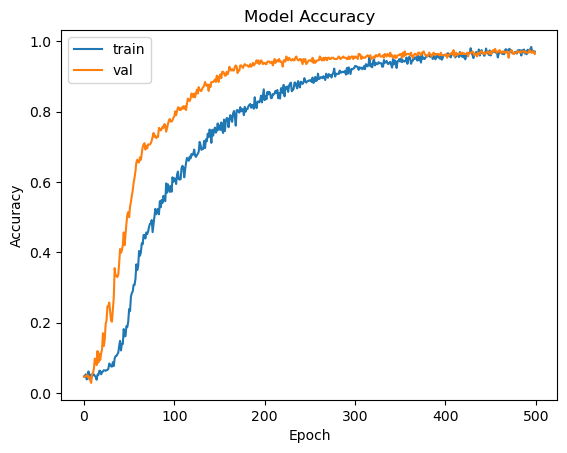

In [21]:
# Plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

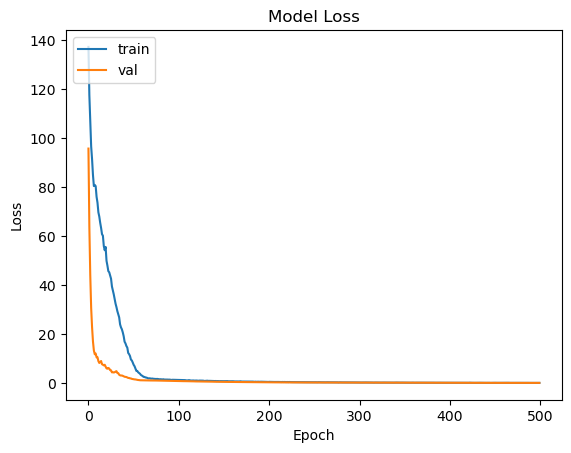

In [22]:
# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [23]:
# Load the audio file
new_audio_path = "F:/Docs/Data Science/Projects/ravdess-emotional-speech-audio/audio_speech_actors_01-24/Actor_01/03-01-01-01-01-01-01.wav"
new_audio, sr = librosa.load(new_audio_path, duration=3, offset=0.5)

# Extract MFCC features for the new audio file
new_mfcc = np.mean(librosa.feature.mfcc(y=new_audio, sr=sr, n_mfcc=40).T, axis=0)
new_mfcc = np.expand_dims(new_mfcc, axis=0)

# Make a prediction using the trained model
prediction = model.predict(new_mfcc)
predicted_label = le.inverse_transform(np.argmax(prediction, axis=1))
print("The predicted emotion is:", predicted_label[0])


1/1 [==============================] - 0s 127ms/step
The predicted emotion is: 01
